<a href="https://colab.research.google.com/github/mrigankapaul-dhubri/TXTA_Praxis_term2/blob/main/TXTA_session_personalPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving bbc-fulltext.zip to bbc-fulltext.zip


In [2]:
!unzip /content/bbc-fulltext.zip

Archive:  /content/bbc-fulltext.zip
   creating: bbc/
   creating: bbc/business/
  inflating: bbc/business/001.txt    
  inflating: bbc/business/002.txt    
  inflating: bbc/business/003.txt    
  inflating: bbc/business/004.txt    
  inflating: bbc/business/005.txt    
  inflating: bbc/business/006.txt    
  inflating: bbc/business/007.txt    
  inflating: bbc/business/008.txt    
  inflating: bbc/business/009.txt    
  inflating: bbc/business/010.txt    
  inflating: bbc/business/011.txt    
  inflating: bbc/business/012.txt    
  inflating: bbc/business/013.txt    
  inflating: bbc/business/014.txt    
  inflating: bbc/business/015.txt    
  inflating: bbc/business/016.txt    
  inflating: bbc/business/017.txt    
  inflating: bbc/business/018.txt    
  inflating: bbc/business/019.txt    
  inflating: bbc/business/020.txt    
  inflating: bbc/business/021.txt    
  inflating: bbc/business/022.txt    
  inflating: bbc/business/023.txt    
  inflating: bbc/business/024.txt    
  infla

In [3]:
import os, re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
from wordcloud import WordCloud, STOPWORDS

In [5]:
global_path = "/content/bbc/"
file_dicts = {'business': [], 'entertainment': [], 'politics': [], 'sport': [], 'tech': []}
for folder in ['business', 'entertainment', 'politics', 'sport', 'tech']:
  folder_path = global_path + folder + "/"
  files = os.listdir(folder_path)
  files = sorted(files)
  for file in files:
    file_path = folder_path + file
    with open(file_path, "r") as f:
      try:
        file_dicts[folder].append(f.read())
      except:
        print(file_path)
        continue


/content/bbc/sport/199.txt


In [8]:
entertainment_news = file_dicts["entertainment"]
entertainment_news[0:5]

['Gallery unveils interactive tree\n\nA Christmas tree that can receive text messages has been unveiled at London\'s Tate Britain art gallery.\n\nThe spruce has an antenna which can receive Bluetooth texts sent by visitors to the Tate. The messages will be "unwrapped" by sculptor Richard Wentworth, who is responsible for decorating the tree with broken plates and light bulbs. It is the 17th year that the gallery has invited an artist to dress their Christmas tree. Artists who have decorated the Tate tree in previous years include Tracey Emin in 2002.\n\nThe plain green Norway spruce is displayed in the gallery\'s foyer. Its light bulb adornments are dimmed, ordinary domestic ones joined together with string. The plates decorating the branches will be auctioned off for the children\'s charity ArtWorks. Wentworth worked as an assistant to sculptor Henry Moore in the late 1960s. His reputation as a sculptor grew in the 1980s, while he has been one of the most influential teachers during t

In [11]:
entertainment_headings = [re.search("(?<=\\n\\n).*",x).group() for x in entertainment_news]
entertainment_headings

["A Christmas tree that can receive text messages has been unveiled at London's Tate Britain art gallery.",
 'French musician Jean-Michel Jarre is to perform at a concert in Copenhagen to mark the bicentennial of the birth of writer Hans Christian Andersen.',
 "The classic film It's A Wonderful Life is to be turned into a musical by the producer of the controversial hit show Jerry Springer - The Opera.",
 "The 10 authors shortlisted for a Richard and Judy book award in 2005 are hoping for a boost in sales following the success of this year's winner.",
 "The stage adaptation of children's film Mary Poppins has had its opening night in London's West End.",
 "The History Boys by Alan Bennett has been named best new play in the Critics' Circle Theatre Awards.",
 'Novelist Andrea Levy is favourite to win the main Whitbread Prize book of the year award, after winning novel of the year with her book Small Island.',
 'The West End is honouring its finest stars and shows at the Evening Standard

In [12]:
entertainment_news_only = [re.sub(entertainment_headings[i], "",entertainment_news[i]) for i in range(len(entertainment_news))]
entertainment_news_only

['Gallery unveils interactive tree\n\n\n\nThe spruce has an antenna which can receive Bluetooth texts sent by visitors to the Tate. The messages will be "unwrapped" by sculptor Richard Wentworth, who is responsible for decorating the tree with broken plates and light bulbs. It is the 17th year that the gallery has invited an artist to dress their Christmas tree. Artists who have decorated the Tate tree in previous years include Tracey Emin in 2002.\n\nThe plain green Norway spruce is displayed in the gallery\'s foyer. Its light bulb adornments are dimmed, ordinary domestic ones joined together with string. The plates decorating the branches will be auctioned off for the children\'s charity ArtWorks. Wentworth worked as an assistant to sculptor Henry Moore in the late 1960s. His reputation as a sculptor grew in the 1980s, while he has been one of the most influential teachers during the last two decades. Wentworth is also known for his photography of mundane, everyday subjects such as a

In [13]:
corpus_entertainment = [re.sub("[^A-Za-z ]", "", x) for x in entertainment_news_only]
corpus_entertainment = [x.lower() for x in corpus_entertainment]
corpus_entertainment

['gallery unveils interactive treethe spruce has an antenna which can receive bluetooth texts sent by visitors to the tate the messages will be unwrapped by sculptor richard wentworth who is responsible for decorating the tree with broken plates and light bulbs it is the th year that the gallery has invited an artist to dress their christmas tree artists who have decorated the tate tree in previous years include tracey emin in the plain green norway spruce is displayed in the gallerys foyer its light bulb adornments are dimmed ordinary domestic ones joined together with string the plates decorating the branches will be auctioned off for the childrens charity artworks wentworth worked as an assistant to sculptor henry moore in the late s his reputation as a sculptor grew in the s while he has been one of the most influential teachers during the last two decades wentworth is also known for his photography of mundane everyday subjects such as a cigarette packet jammed under the wonky leg 

In [16]:
single_text_entertainment = " ".join(corpus_entertainment)
single_text_entertainment

'gallery unveils interactive treethe spruce has an antenna which can receive bluetooth texts sent by visitors to the tate the messages will be unwrapped by sculptor richard wentworth who is responsible for decorating the tree with broken plates and light bulbs it is the th year that the gallery has invited an artist to dress their christmas tree artists who have decorated the tate tree in previous years include tracey emin in the plain green norway spruce is displayed in the gallerys foyer its light bulb adornments are dimmed ordinary domestic ones joined together with string the plates decorating the branches will be auctioned off for the childrens charity artworks wentworth worked as an assistant to sculptor henry moore in the late s his reputation as a sculptor grew in the s while he has been one of the most influential teachers during the last two decades wentworth is also known for his photography of mundane everyday subjects such as a cigarette packet jammed under the wonky leg o

In [17]:
tokens = re.findall("\w+",single_text_entertainment)
tokens

['gallery',
 'unveils',
 'interactive',
 'treethe',
 'spruce',
 'has',
 'an',
 'antenna',
 'which',
 'can',
 'receive',
 'bluetooth',
 'texts',
 'sent',
 'by',
 'visitors',
 'to',
 'the',
 'tate',
 'the',
 'messages',
 'will',
 'be',
 'unwrapped',
 'by',
 'sculptor',
 'richard',
 'wentworth',
 'who',
 'is',
 'responsible',
 'for',
 'decorating',
 'the',
 'tree',
 'with',
 'broken',
 'plates',
 'and',
 'light',
 'bulbs',
 'it',
 'is',
 'the',
 'th',
 'year',
 'that',
 'the',
 'gallery',
 'has',
 'invited',
 'an',
 'artist',
 'to',
 'dress',
 'their',
 'christmas',
 'tree',
 'artists',
 'who',
 'have',
 'decorated',
 'the',
 'tate',
 'tree',
 'in',
 'previous',
 'years',
 'include',
 'tracey',
 'emin',
 'in',
 'the',
 'plain',
 'green',
 'norway',
 'spruce',
 'is',
 'displayed',
 'in',
 'the',
 'gallerys',
 'foyer',
 'its',
 'light',
 'bulb',
 'adornments',
 'are',
 'dimmed',
 'ordinary',
 'domestic',
 'ones',
 'joined',
 'together',
 'with',
 'string',
 'the',
 'plates',
 'decorating',


In [18]:
tokens_no_stopwords = [x for x in tokens if x not in STOPWORDS]
tokens_no_stopwords[:10]

['gallery',
 'unveils',
 'interactive',
 'treethe',
 'spruce',
 'antenna',
 'receive',
 'bluetooth',
 'texts',
 'sent']

In [19]:
wc = WordCloud(width = 800, height = 600, stopwords = STOPWORDS)

In [20]:
import matplotlib.pyplot as plt

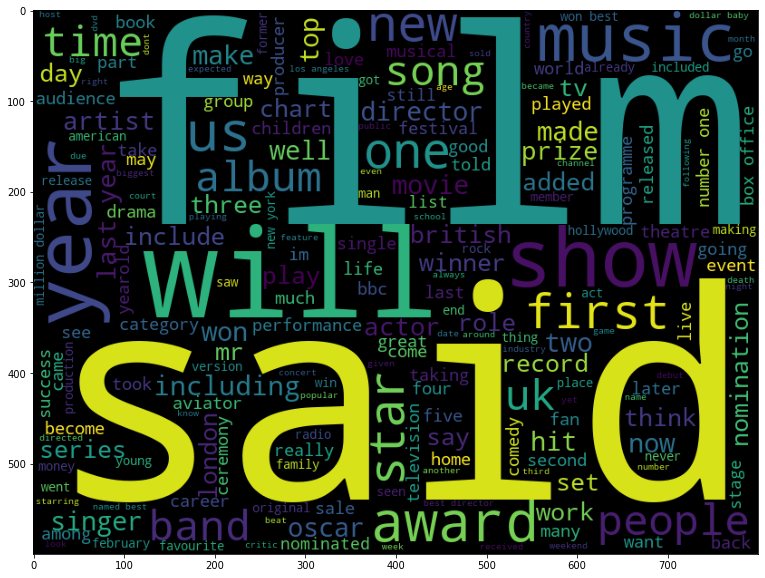

In [25]:
plt.figure(figsize = (15,10))
plt.imshow(wc.generate_from_text(single_text_entertainment))

In [23]:
from collections import Counter

In [24]:
C = Counter(tokens_no_stopwords)
C.most_common(30)

[('said', 773),
 ('film', 604),
 ('will', 546),
 ('best', 545),
 ('music', 381),
 ('m', 360),
 ('one', 318),
 ('us', 311),
 ('years', 286),
 ('new', 281),
 ('show', 265),
 ('last', 244),
 ('first', 237),
 ('year', 235),
 ('number', 215),
 ('award', 204),
 ('won', 203),
 ('awards', 202),
 ('films', 193),
 ('two', 189),
 ('people', 186),
 ('mr', 184),
 ('uk', 184),
 ('director', 181),
 ('tv', 174),
 ('album', 173),
 ('actor', 166),
 ('band', 162),
 ('top', 160),
 ('british', 159)]

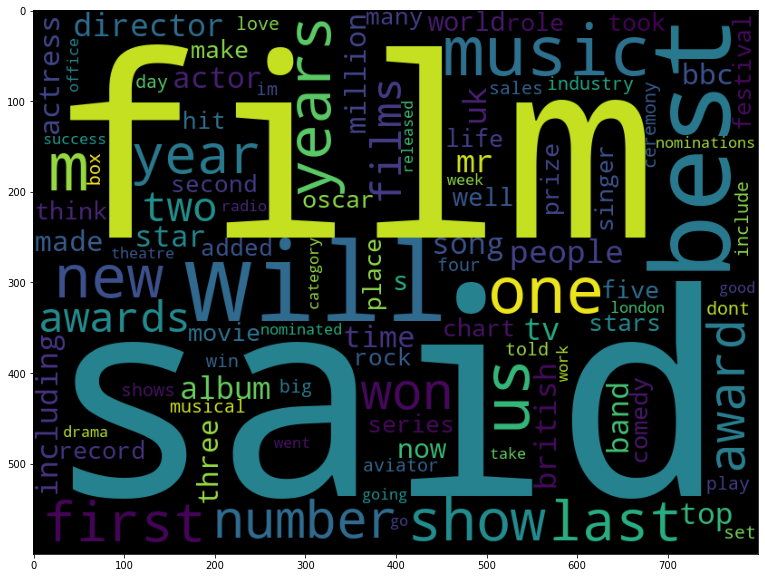

In [27]:
most_fre_words = {k:v for k,v in C.most_common(100)}
plt.figure(figsize = (15,10))
plt.imshow(wc.generate_from_frequencies(most_fre_words))